In [5]:
import numpy as np
import pandas as pd

In [6]:
titanic = pd.read_csv('https://raw.githubusercontent.com/dphi-official/First_ML_Model/master/titanic.csv')
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
print('Total number of passangers in the training data...', len(titanic))
print('Number of passangers in the training data who survived...', len(titanic[titanic['Survived'] == 1]))

Total number of passangers in the training data... 891
Number of passangers in the training data who survived... 342


In [10]:
print('% of men who survived', 100*np.mean(titanic['Survived'][titanic['Sex'] == 'male']))
print('% of women who survived', 100*np.mean(titanic['Survived'][titanic['Sex'] == 'female']))

% of men who survived 18.890814558058924
% of women who survived 74.20382165605095


In [11]:
print('% of passengers who survived in first class', 100*np.mean(titanic['Survived'][titanic['Pclass'] == 1]))
print('% of passengers who survived in second class', 100*np.mean(titanic['Survived'][titanic['Pclass'] == 2]))
print('% of passengers who survived in third class', 100*np.mean(titanic['Survived'][titanic['Pclass'] == 3]))

% of passengers who survived in first class 62.96296296296296
% of passengers who survived in second class 47.28260869565217
% of passengers who survived in third class 24.236252545824847


In [12]:
print('% of children who survived', 100*np.mean(titanic['Survived'][titanic['Age'] < 18]))
print('% of adults who survived', 100*np.mean(titanic['Survived'][titanic['Age'] > 18]))

% of children who survived 53.98230088495575
% of adults who survived 38.26086956521739


In [13]:
titanic['Sex'] = titanic['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [14]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
titanic['Age'] = titanic['Age'].fillna(np.mean(titanic['Age']))

In [16]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
titanic.Embarked.fillna(value='S', axis = 0, inplace = True)

In [18]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [19]:
# omit irrelevant columns
titanic = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

In [20]:
X = titanic.drop('Survived', axis = 1)
y = titanic['Survived']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare
6,1,1,54.000000,0,0,51.8625
718,3,1,29.699118,0,0,15.5000
685,2,1,25.000000,1,2,41.5792
73,3,1,26.000000,1,0,14.4542
882,3,0,22.000000,0,0,10.5167
...,...,...,...,...,...,...
106,3,0,21.000000,0,0,7.6500
270,1,1,29.699118,0,0,31.0000
860,3,1,41.000000,2,0,14.1083
435,1,0,14.000000,1,2,120.0000


In [23]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [25]:
from sklearn.metrics import accuracy_score
print('Training accuracy...', accuracy_score(y_train, model.predict(X_train)))
print('Test accuracy', accuracy_score(y_test, model.predict(X_test)))

Training accuracy... 0.9798657718120806
Test accuracy 0.7322033898305085


In [26]:
from sklearn.tree import export_graphviz
import graphviz

In [27]:
dot_data= export_graphviz(model, out_file=None,
feature_names=X_test.columns,
class_names=['0', '1'],
filled=True, rounded=True,
special_characters=True)

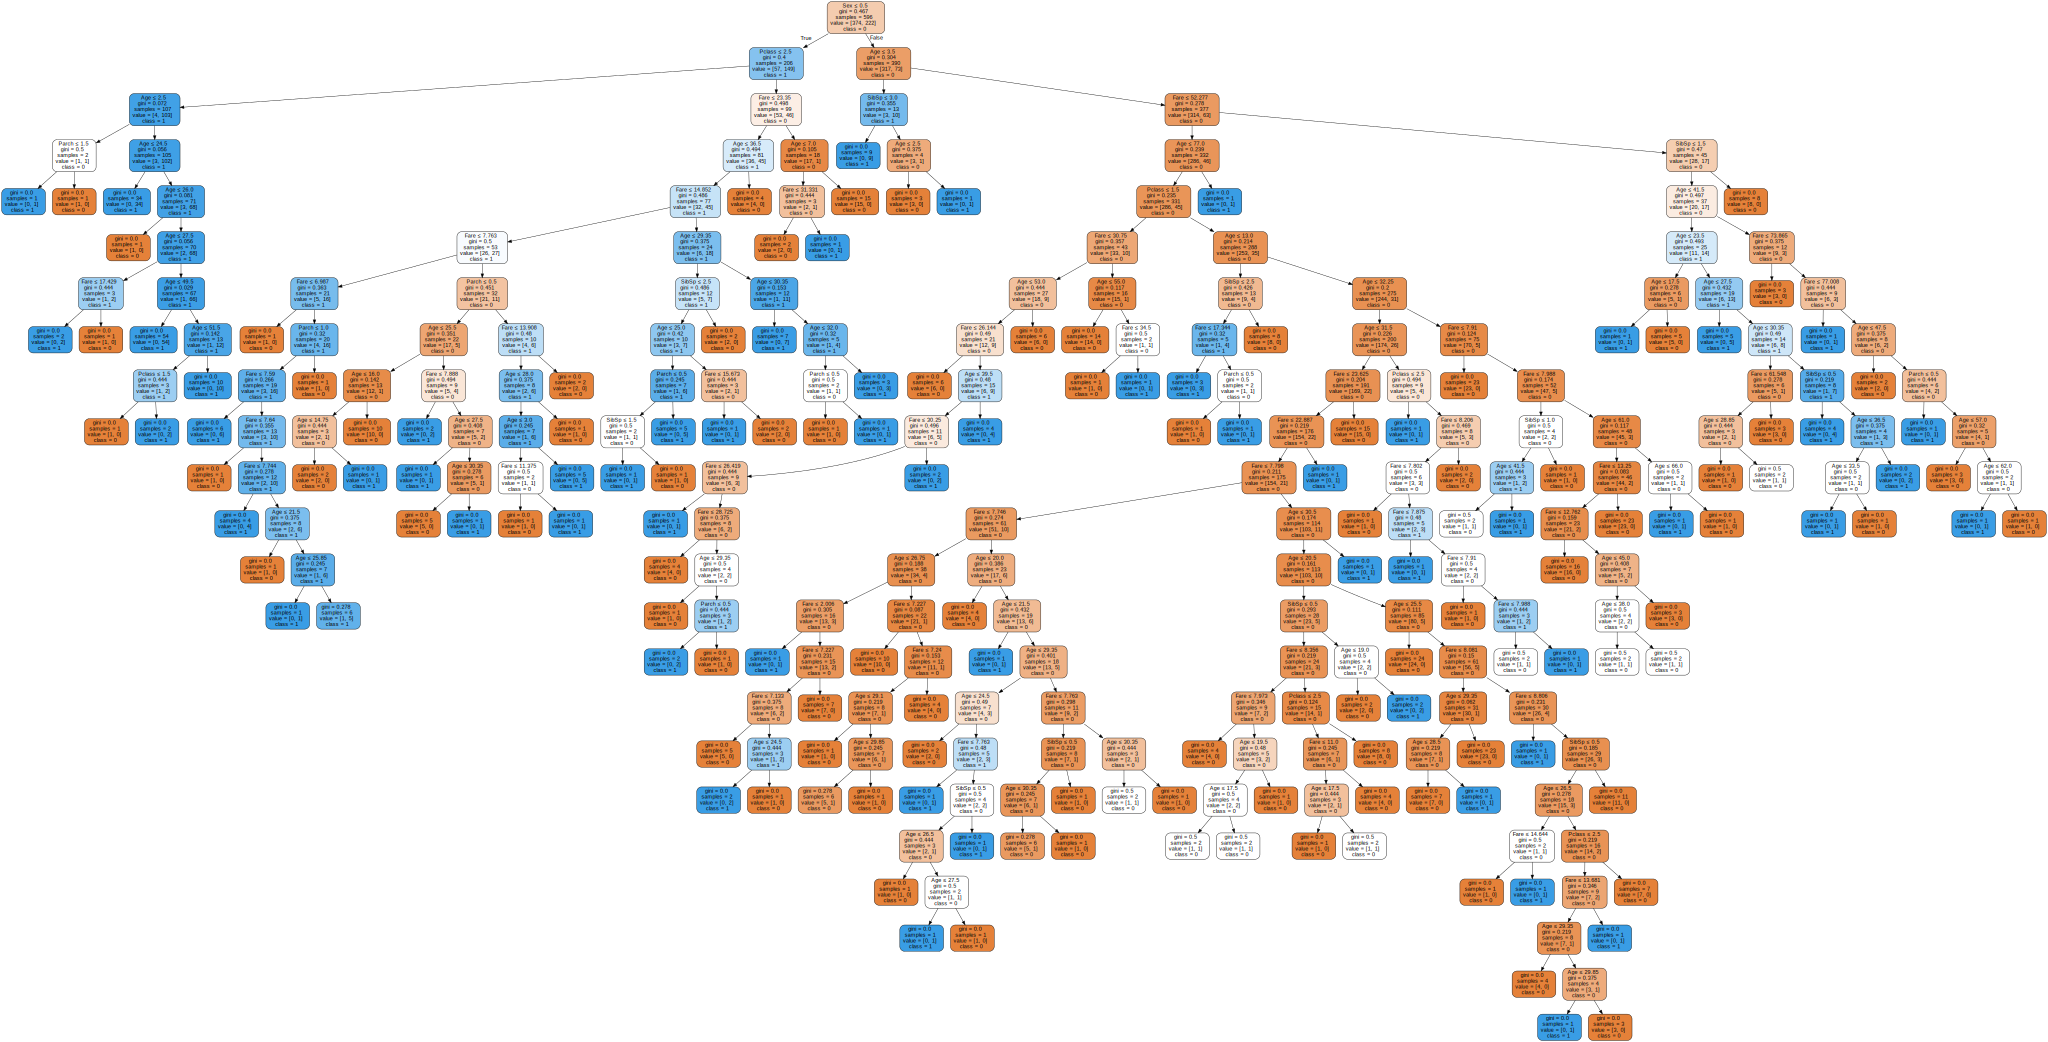

In [29]:
graph1=graphviz.Source(dot_data)
graph1

In [30]:
model_improved = DecisionTreeClassifier(max_depth = 3)
model_improved.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [31]:
print('train score...' , accuracy_score(y_train, model_improved.predict(X_train)))
print('test score...', accuracy_score(y_test, model_improved.predict(X_test)))

train score... 0.8238255033557047
test score... 0.8203389830508474


In [32]:
dot_data= export_graphviz(model_improved, out_file=None,impurity=False,
feature_names=X_test.columns,
class_names=['0', '1'],
filled=True, rounded=True)

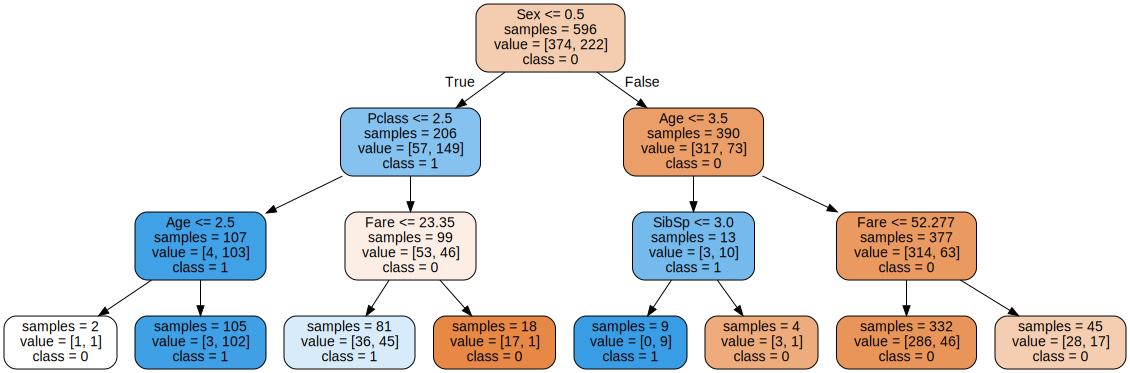

In [33]:
graph2=graphviz.Source(dot_data)
graph2